<a href="https://colab.research.google.com/github/kserdem/wiJa5VbZ8D4Mj1PX/blob/main/Apziva_Data_Analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#REPORT

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
* X1 = my order was delivered on time
* X2 = contents of my order was as I expected
* X3 = I ordered everything I wanted to order
* X4 = I paid a good price for my order
* X5 = I am satisfied with my courier
* X6 = the app makes ordering easy for me

> The most important variables X1,X3,X5,X6 determined.(GBM Feature Important)

> 9 different algorithms were used in the analysis.
* Logistic Regression
* GBM
* Naive Bayes
* Neural Networks
* LGBM
* XGB
* Decision Tree
* Random Forest
* CatBoost


> **THE BEST THREE MODEL**
* FEATURES ARE X1,X3,X5,X6
* CATBOOST -> Accuracy Score = 0.79
* XGB -> Accuracy Score = 0.78
* GBM and RANDOM FOREST -> Accuracy Score = 0.76







In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:
!pip install catboost

     |████████████████████████████████| 65.8MB 83kB/s 


In [5]:
from catboost import CatBoostClassifier

In [6]:
path="/content/drive/MyDrive/Projeler/Apziva/"
First_data=pd.read_csv(path+"ACME-HappinessSurvey2020.csv")
data=First_data.copy()
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


#DATA INFO

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


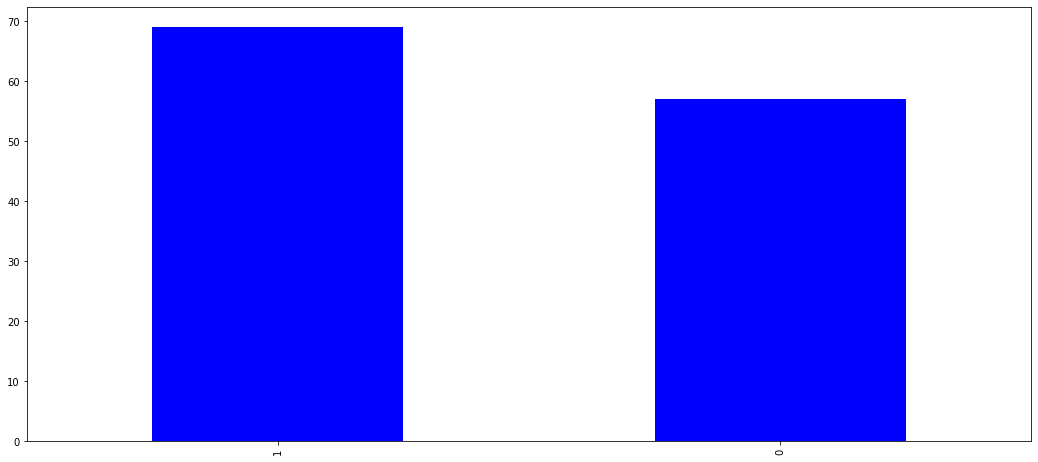

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (18, 8))#subplot acılacak pencere sayısını gösterir
data["Y"].value_counts().plot.bar(color = "blue", ax = ax)

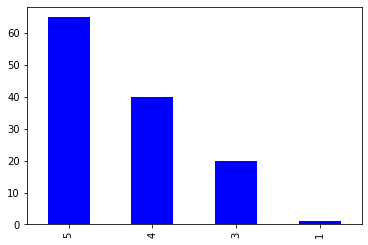

In [ ]:
data["X1"].value_counts().plot.bar(color = "blue")

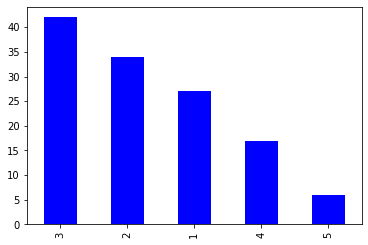

In [ ]:
data["X2"].value_counts().plot.bar(color = "blue")

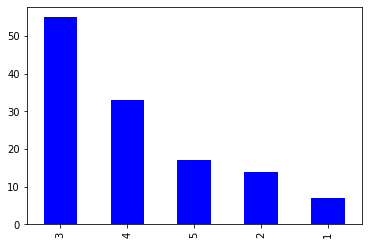

In [ ]:
data["X3"].value_counts().plot.bar(color = "blue")

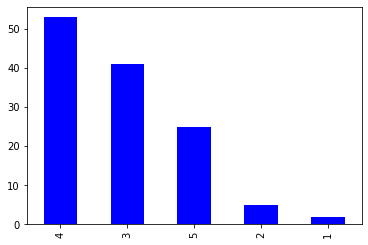

In [ ]:
data["X4"].value_counts().plot.bar(color = "blue")

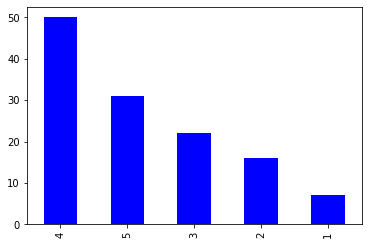

In [ ]:
data["X5"].value_counts().plot.bar(color = "blue")

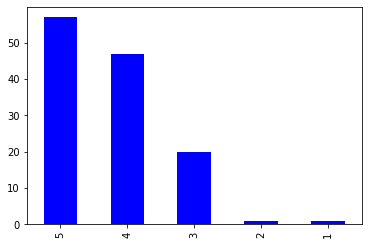

In [ ]:
data["X6"].value_counts().plot.bar(color = "blue")

#TRAİN-TEST

In [7]:
y=data['Y']
data=data.drop('Y',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      126 non-null    int64
 1   X2      126 non-null    int64
 2   X3      126 non-null    int64
 3   X4      126 non-null    int64
 4   X5      126 non-null    int64
 5   X6      126 non-null    int64
dtypes: int64(6)
memory usage: 6.0 KB


In [195]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.43, random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (71, 6)
y_train (71,)
X_test (55, 6)
y_test (55,)


# LOJİSTİK REGRESYON

In [74]:
#Tüm değişkenler modele alındığında
loj=LogisticRegression(random_state=55)
loj_model=loj.fit(X_train,y_train)
y_pred=loj_model.predict(X_test)
print(accuracy_score(y_test,loj_model.predict(X_test)))

print(classification_report(y_test,y_pred))


0.5636363636363636
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        29
           1       0.54      0.54      0.54        26

    accuracy                           0.56        55
   macro avg       0.56      0.56      0.56        55
weighted avg       0.56      0.56      0.56        55



In [62]:
selection=data[['X3','X5']]
from sklearn.model_selection import train_test_split, cross_val_score
X_train_selection,X_test_selection,y_train,y_test=train_test_split(selection,y,test_size=0.53, random_state=42)
print("X_train", X_train_selection.shape)

print("y_train",y_train.shape)

print("X_test",X_test_selection.shape)

print("y_test",y_test.shape)

X_train (59, 2)
y_train (59,)
X_test (67, 2)
y_test (67,)


In [64]:
loj=LogisticRegression(random_state=11)
loj_model_tune=loj.fit(X_train_selection,y_train)
y_pred=loj_model.predict(X_test_selection)
print(accuracy_score(y_test,loj_model.predict(X_test_selection)))
print(classification_report(y_test,y_pred))

0.5970149253731343
              precision    recall  f1-score   support

           0       0.63      0.38      0.47        32
           1       0.58      0.80      0.67        35

    accuracy                           0.60        67
   macro avg       0.61      0.59      0.57        67
weighted avg       0.61      0.60      0.58        67



# GBM MODEL

In [76]:
gbm_model = GradientBoostingClassifier(random_state=11).fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)
print(classification_report(y_test,y_pred_gbm ))


              precision    recall  f1-score   support

           0       0.62      0.52      0.57        29
           1       0.55      0.65      0.60        26

    accuracy                           0.58        55
   macro avg       0.59      0.59      0.58        55
weighted avg       0.59      0.58      0.58        55



In [ ]:
Importance = pd.DataFrame({"Importance": gbm_model.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'GBM Model Değişken Önem Düzeyleri')

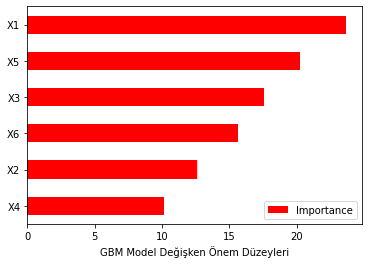

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("GBM Model Değişken Önem Düzeyleri")

In [120]:
# GBM Modelinde Önemli Çıkan ilk 4 Değişken ile model kuralım
selection=data[['X1','X5','X3','X6']]
from sklearn.model_selection import train_test_split, cross_val_score
X_train_selection,X_test_selection,y_train,y_test=train_test_split(selection,y,test_size=0.65 ,random_state=42)
print("X_train", X_train_selection.shape)

print("y_train",y_train.shape)

print("X_test",X_test_selection.shape)

print("y_test",y_test.shape)

X_train (44, 4)
y_train (44,)
X_test (82, 4)
y_test (82,)


In [110]:
gbm_model_tune = GradientBoostingClassifier(random_state=11,learning_rate=0.1).fit(X_train_selection, y_train)
y_pred_gbm = gbm_model.predict(X_test_selection)
print(classification_report(y_test,y_pred_gbm ))


              precision    recall  f1-score   support

           0       0.85      0.58      0.69        38
           1       0.71      0.91      0.80        44

    accuracy                           0.76        82
   macro avg       0.78      0.74      0.74        82
weighted avg       0.78      0.76      0.75        82



#NAİVE BAYES

In [114]:
nb = GaussianNB()
nb_model = nb.fit(X_train_selection, y_train)
y_pred_nb = nb_model.predict(X_test_selection)
print(classification_report(y_test,y_pred_nb))


              precision    recall  f1-score   support

           0       0.52      0.61      0.56        38
           1       0.61      0.52      0.56        44

    accuracy                           0.56        82
   macro avg       0.56      0.56      0.56        82
weighted avg       0.57      0.56      0.56        82



#NEURAL NETWORK

In [118]:
nn_model = MLPClassifier( random_state=42).fit(X_train, y_train)
y_pred_nn= nn_model.predict(X_test)
print(classification_report(y_test,y_pred_nn))
accuracy_score(y_test,y_pred_nn)

              precision    recall  f1-score   support

           0       0.56      0.52      0.54        29
           1       0.50      0.54      0.52        26

    accuracy                           0.53        55
   macro avg       0.53      0.53      0.53        55
weighted avg       0.53      0.53      0.53        55



0.5272727272727272

In [122]:
nn_model_tune = MLPClassifier( random_state=42).fit(X_train_selection, y_train)
y_pred_nn= nn_model_tune.predict(X_test_selection)
print(classification_report(y_test,y_pred_nn))
accuracy_score(y_test,y_pred_nn)

              precision    recall  f1-score   support

           0       0.50      0.37      0.42        38
           1       0.56      0.68      0.61        44

    accuracy                           0.54        82
   macro avg       0.53      0.53      0.52        82
weighted avg       0.53      0.54      0.53        82



0.5365853658536586

#LGBM MODEL

In [129]:
lgbm=LGBMClassifier(random_state=42,n_estimators=500).fit(X_train, y_train)
y_pred_train= lgbm.predict(X_test)
print(classification_report(y_test,y_pred_train))
accuracy_score(y_test,y_pred_train)

              precision    recall  f1-score   support

           0       0.60      0.62      0.61        29
           1       0.56      0.54      0.55        26

    accuracy                           0.58        55
   macro avg       0.58      0.58      0.58        55
weighted avg       0.58      0.58      0.58        55



0.5818181818181818

In [130]:
Importance = pd.DataFrame({"Importance": lgbm.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'LGBM Model Değişken Önem Düzeyleri')

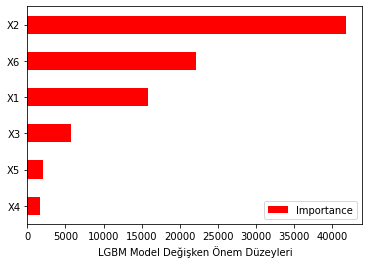

In [131]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("LGBM Model Değişken Önem Düzeyleri")

In [212]:
# LGBM Modelinde Önemli Çıkan ilk 3 Değişken ile model kuralım
selection=data[['X1','X6','X5','X3']]
from sklearn.model_selection import train_test_split, cross_val_score
X_train_selection,X_test_selection,y_train,y_test=train_test_split(selection,y,test_size=0.43, random_state=42)
print("X_train", X_train_selection.shape)

print("y_train",y_train.shape)

print("X_test",X_test_selection.shape)

print("y_test",y_test.shape)

X_train (71, 4)
y_train (71,)
X_test (55, 4)
y_test (55,)


In [213]:
lgbm_tune=LGBMClassifier(random_state=42).fit(X_train_selection, y_train)
y_pred_train= lgbm_tune.predict(X_test_selection)
print(classification_report(y_test,y_pred_train))


              precision    recall  f1-score   support

           0       0.60      0.62      0.61        29
           1       0.56      0.54      0.55        26

    accuracy                           0.58        55
   macro avg       0.58      0.58      0.58        55
weighted avg       0.58      0.58      0.58        55



# XGB MODEL

In [135]:
xgb_model = XGBClassifier(random_state=11,n_estimators=300).fit(X_train, y_train)
y_pred_xgb= xgb_model.predict(X_test)
print(classification_report(y_test,y_pred_xgb))


              precision    recall  f1-score   support

           0       0.64      0.55      0.59        29
           1       0.57      0.65      0.61        26

    accuracy                           0.60        55
   macro avg       0.60      0.60      0.60        55
weighted avg       0.61      0.60      0.60        55



In [156]:

selection=data[['X1','X6','X3','X5']]
from sklearn.model_selection import train_test_split, cross_val_score
X_train_selection,X_test_selection,y_train,y_test=train_test_split(selection,y,test_size=0.14, random_state=42)
print("X_train", X_train_selection.shape)

print("y_train",y_train.shape)

print("X_test",X_test_selection.shape)

print("y_test",y_test.shape)

X_train (108, 4)
y_train (108,)
X_test (18, 4)
y_test (18,)


In [158]:
xgb_model_tune = XGBClassifier(random_state=11).fit(X_train_selection, y_train)
y_pred_xgb= xgb_model.predict(X_test_selection)
print(classification_report(y_test,y_pred_xgb))


              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.70      0.88      0.78         8

    accuracy                           0.78        18
   macro avg       0.79      0.79      0.78        18
weighted avg       0.80      0.78      0.78        18



#DECİSİON TREE

In [173]:
selection=data[['X1','X6','X3','X5']]
from sklearn.model_selection import train_test_split, cross_val_score
X_train_selection,X_test_selection,y_train,y_test=train_test_split(selection,y,test_size=0.15, random_state=42)
print("X_train", X_train_selection.shape)

print("y_train",y_train.shape)

print("X_test",X_test_selection.shape)

print("y_test",y_test.shape)

X_train (107, 4)
y_train (107,)
X_test (19, 4)
y_test (19,)


In [174]:
dt_model = DecisionTreeClassifier().fit(X_train_selection, y_train)
y_pred = dt_model.predict(X_test_selection)
accuracy_score(y_test, y_pred)

0.7368421052631579

#RANDOM FOREST

In [196]:
rf_model = RandomForestClassifier(random_state=12).fit(X_train, y_train)
y_pred= rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62        29
           1       0.59      0.65      0.62        26

    accuracy                           0.62        55
   macro avg       0.62      0.62      0.62        55
weighted avg       0.62      0.62      0.62        55



In [208]:
selection=data[['X1','X6','X3','X5']]
from sklearn.model_selection import train_test_split, cross_val_score
X_train_selection,X_test_selection,y_train,y_test=train_test_split(selection,y,test_size=0.13, random_state=42)
print("X_train", X_train_selection.shape)

print("y_train",y_train.shape)

print("X_test",X_test_selection.shape)

print("y_test",y_test.shape)

X_train (109, 4)
y_train (109,)
X_test (17, 4)
y_test (17,)


In [209]:
rf_model_tune = RandomForestClassifier().fit(X_train_selection, y_train)
y_pred= rf_model_tune.predict(X_test_selection)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.70      0.88      0.78         8

    accuracy                           0.76        17
   macro avg       0.78      0.77      0.76        17
weighted avg       0.78      0.76      0.76        17



#CATBOOST

In [28]:
selection=data[['X1','X6','X5','X3']]
from sklearn.model_selection import train_test_split, cross_val_score
X_train_selection,X_test_selection,y_train,y_test=train_test_split(selection,y,test_size=0.15, random_state=42, shuffle= True)
print("X_train", X_train_selection.shape)

print("y_train",y_train.shape)

print("X_test",X_test_selection.shape)

print("y_test",y_test.shape)

X_train (107, 4)
y_train (107,)
X_test (19, 4)
y_test (19,)


In [30]:
model = CatBoostClassifier(random_state=11).fit(X_train_selection, y_train)
y_pred_model = model.predict(X_test_selection)
print(classification_report(y_test,y_pred_model ))


Learning rate set to 0.003967
0:	learn: 0.6922996	total: 790us	remaining: 790ms
1:	learn: 0.6913906	total: 1.35ms	remaining: 674ms
2:	learn: 0.6904085	total: 1.95ms	remaining: 649ms
3:	learn: 0.6894650	total: 2.42ms	remaining: 603ms
4:	learn: 0.6883247	total: 2.92ms	remaining: 582ms
5:	learn: 0.6872040	total: 3.42ms	remaining: 566ms
6:	learn: 0.6863275	total: 3.88ms	remaining: 550ms
7:	learn: 0.6857681	total: 4.3ms	remaining: 533ms
8:	learn: 0.6844529	total: 4.8ms	remaining: 528ms
9:	learn: 0.6835870	total: 5.3ms	remaining: 525ms
10:	learn: 0.6824296	total: 5.81ms	remaining: 522ms
11:	learn: 0.6817361	total: 6.31ms	remaining: 519ms
12:	learn: 0.6808387	total: 6.81ms	remaining: 517ms
13:	learn: 0.6799973	total: 7.23ms	remaining: 509ms
14:	learn: 0.6795924	total: 7.6ms	remaining: 499ms
15:	learn: 0.6783598	total: 8.39ms	remaining: 516ms
16:	learn: 0.6772020	total: 9.06ms	remaining: 524ms
17:	learn: 0.6759924	total: 9.61ms	remaining: 524ms
18:	learn: 0.6752012	total: 10.2ms	remaining: 524

In [31]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }


In [32]:
catb = CatBoostClassifier(random_state=11)
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train_selection, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.0s


0:	learn: 0.6771339	total: 765us	remaining: 152ms
1:	learn: 0.6708191	total: 1.58ms	remaining: 157ms
2:	learn: 0.6616039	total: 2.14ms	remaining: 141ms
3:	learn: 0.6480780	total: 2.94ms	remaining: 144ms
4:	learn: 0.6317321	total: 3.77ms	remaining: 147ms
5:	learn: 0.6231814	total: 4.45ms	remaining: 144ms
6:	learn: 0.6174295	total: 4.87ms	remaining: 134ms
7:	learn: 0.6111954	total: 5.24ms	remaining: 126ms
8:	learn: 0.6044808	total: 5.65ms	remaining: 120ms
9:	learn: 0.6013049	total: 5.99ms	remaining: 114ms
10:	learn: 0.5899507	total: 6.58ms	remaining: 113ms
11:	learn: 0.5828491	total: 7.2ms	remaining: 113ms
12:	learn: 0.5805592	total: 7.59ms	remaining: 109ms
13:	learn: 0.5735580	total: 8.12ms	remaining: 108ms
14:	learn: 0.5677639	total: 8.65ms	remaining: 107ms
15:	learn: 0.5652982	total: 9.12ms	remaining: 105ms
16:	learn: 0.5607152	total: 9.64ms	remaining: 104ms
17:	learn: 0.5538088	total: 10.2ms	remaining: 103ms
18:	learn: 0.5508006	total: 10.7ms	remaining: 101ms
19:	learn: 0.5501751	tot

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   20.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f3e42e43198>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [33]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.05}

In [39]:
catb = CatBoostClassifier(iterations = 300, 
                          learning_rate = 0.01, 
                          depth = 8)

In [40]:
catb_tuned = catb.fit(X_train_selection, y_train)
y_pred = catb_tuned.predict(X_test_selection)
accuracy_score(y_test, y_pred)

0:	learn: 0.6903140	total: 3.18ms	remaining: 951ms
1:	learn: 0.6891098	total: 4.11ms	remaining: 612ms
2:	learn: 0.6858659	total: 4.69ms	remaining: 464ms
3:	learn: 0.6834774	total: 5.33ms	remaining: 394ms
4:	learn: 0.6805973	total: 5.83ms	remaining: 344ms
5:	learn: 0.6786589	total: 6.27ms	remaining: 307ms
6:	learn: 0.6768352	total: 6.68ms	remaining: 280ms
7:	learn: 0.6750424	total: 7.2ms	remaining: 263ms
8:	learn: 0.6730573	total: 7.65ms	remaining: 247ms
9:	learn: 0.6712024	total: 8.15ms	remaining: 236ms
10:	learn: 0.6681128	total: 8.66ms	remaining: 228ms
11:	learn: 0.6650885	total: 9.23ms	remaining: 222ms
12:	learn: 0.6637723	total: 9.68ms	remaining: 214ms
13:	learn: 0.6619004	total: 10.1ms	remaining: 207ms
14:	learn: 0.6601276	total: 10.6ms	remaining: 201ms
15:	learn: 0.6576482	total: 11ms	remaining: 195ms
16:	learn: 0.6566261	total: 11.4ms	remaining: 191ms
17:	learn: 0.6549500	total: 11.9ms	remaining: 187ms
18:	learn: 0.6521365	total: 12.5ms	remaining: 185ms
19:	learn: 0.6491205	tota

0.7894736842105263